In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Get the data and define col names
colnames=["sepal_length_in_cm", "sepal_width_in_cm","petal_length_in_cm","petal_width_in_cm", "class"]

#Read the dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names= colnames )

#See the Data
dataset.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Use pandas to encode the categorized columns

dataset = dataset.replace({"class":  {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}})
#Read the new dataset
dataset.head()


,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


####  Analyze the Data: There are no more than 50 rows for each type of Iris. It may be useful to look at the correlation between them.

Text(0.5, 1.0, 'Correlation between iris Classes')

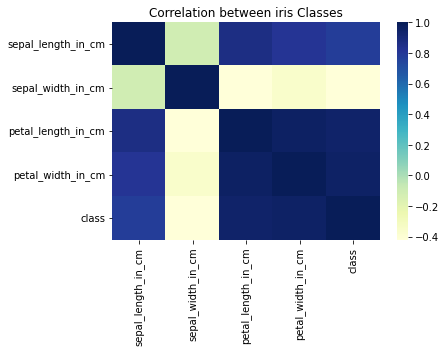

In [5]:
plt.figure(1)
sns.heatmap(dataset.corr(), cmap="YlGnBu")
plt.title('Correlation between iris Classes')

#### Split the Data

In [6]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Create the SVM Classifier

In [7]:
#Create the SVM classifier model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data

classifier.fit(X_train, y_train)

#Make the prediction
y_pred = classifier.predict(X_test)

#### Verify the acurracy of the model , using the confusion matrix and the cross validation

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 98.18 %
Standard Deviation: 3.64 %


A 98% of accuracy is derived which is acceptable. The confusion matrix shows that there is one misclassified data.

In [9]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

Comparing four kernel models

In [12]:
from sklearn.metrics import classification_report
for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)# Train a SVC model using different kernal
    classifier = getClassifier(i) 
    classifier.fit(X_train, y_train)# Make prediction
    y_pred = classifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.80      1.00      0.89         8
           3       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30

Evaluation: RBF kernel
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fine tuning hyperparameters

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.2s finished


In [14]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))#Output

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.90      1.00      0.95         9
           3       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

